In [ ]:
#@title Einladen der notwendigen Pakete
#@markdown Führen Sie die Zelle über den linken "Play-Button" aus um die notwendigen Packages für die Pythonscripte zu laden.
#import the following for handling data in colab
from google.colab import files
#import numpy
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt

#Auswertung des UV-VIS-Spektrums von Myoglobin

In [ ]:
#@title Einladen des UV-VIS-Spektrums von Myogloin
#@markdown Führen Sie die Zelle über den linken "Play-Button" aus und wählen Sie "Durchsuchen" um das UV-VIS-Spektrum Ihrer Myoglobinproba zu laden.
uvvisUpload = files.upload()
uvvisFileName = next(iter(uvvisUpload))


Saving MyoglobinSpectra.ndv to MyoglobinSpectra.ndv


In [ ]:
#@title Herausschreiben der UV-VIS-Daten
with open(uvvisFileName, 'r') as f:
    lines = f.readlines()
    wl_row = lines[4].split('\t')[14:]
    wavelength = np.array(wl_row, dtype=float)
#    print(wavelength)
#    print(wavelength[1])    


with open(uvvisFileName, 'r') as f:
    lines = f.readlines()
    names = []
    row = lines[5].split('\t')[14:]
    new_array = np.char.replace(row, ",", ".")
    numOfElemts = new_array.size
    data = np.zeros((len(lines)-5, numOfElemts))
    for i in range(5, len(lines)):
      name = lines[i].split('\t')[0]
      names.append(name)      
      row = lines[i].split('\t')[14:]
      new_array = np.char.replace(row, ",", ".")
      data[i-5,:] = new_array


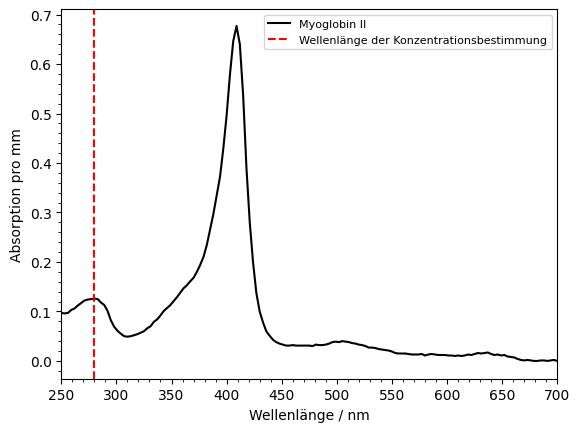

Ausgewählte Wellenlänge (in nm):
280.0
Absorption pro mm bei 280.0 nm:
[[0.126]]


In [ ]:
#@title Darstellen des Spektrums
#@markdown https://stackoverflow.com/questions/73481122/using-google-colab-forms-input-as-dropdown-can-i-put-the-read-file-and-add-on-t

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

#@markdown Geben Sie die Wellenlänge (in nm) an bei der auf die Proteinkonzentration geschlossen werden kann:
Wellenlänge_CD = 280 #@param {type:"integer"}
wl_select = find_nearest(wavelength, value=Wellenlänge_CD)
wl_index = np.where(wavelength == wl_select)
Alle = True #@param {type:"boolean"}
if (Alle):
  Spektrenanzahl = len(names)

Achsenbeschriftung_X =  'Wellenl\xE4nge / nm' #@param {type:"string"}
Achsenbeschriftung_Y = 'Absorption pro mm' #@param {type:"string"}

plt.plot(wavelength, data[1,:], color="black",label = names[1])
plt.axvline(x = Wellenlänge_CD, color = 'r', linestyle='dashed',label = 'Wellenlänge der Konzentrationsbestimmung')
plt.xlim(250,700)
plt.xlabel(Achsenbeschriftung_X)
plt.ylabel(Achsenbeschriftung_Y)

plt.minorticks_on()

plt.legend(prop={'size': 8})

plt.savefig('UV_VIS.png', dpi=300)

plt.show()

abs = data[1,wl_index]
print("Ausgewählte Wellenlänge (in nm):")
print(str(wl_select))
print(Achsenbeschriftung_Y + " bei " + str(wl_select) + " nm:")
print(str(data[1,wl_index]))


In [ ]:
#@title Download des UV-VIS-Spektrums
files.download('UV_VIS.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Auswertung des CD-Spektrums von Myoglobin bei 25 °C

In [ ]:
#@title Einladen des **CD-Pufferspektrum**
#@markdown Führen Sie die Zelle über den linken "Play-Button" aus und wählen Sie "Durchsuchen" um das CD-Spektrum Ihrer Puffermessung zu laden.
bufferUpload = files.upload()
bufferFileName = next(iter(bufferUpload))


Saving 001_NaPhos_6_6_25deg.txt to 001_NaPhos_6_6_25deg.txt


In [ ]:
#@title Einladen des **Protein-CD-Spektrums**
#@markdown Führen Sie die Zelle über den linken "Play-Button" aus und wählen Sie "Durchsuchen" um das CD-Spektrum des Myoglobins bei 25 °C zu laden.
#from google.colab import files
CDUpload = files.upload()
CDFileName = next(iter(CDUpload))

Saving 002_Myoglobin_07mg_ml_25deg.txt to 002_Myoglobin_07mg_ml_25deg.txt


In [ ]:
#@title Herausschreiben der **Wellenlänge** mit den zugehörigen Werten für **CD** und die **HT-Spannung** aus den *zuvor eingeladenen* .txt-Dateien
# Text file data converted to float CD_data skipping the header (first 19 lines)
Buffer_data = np.loadtxt(bufferFileName, skiprows=19, dtype=float)
wavelength_b = (Buffer_data[:,0])
CDvalue_b = (Buffer_data[:,1])
HTvoltage_b = (Buffer_data[:,2])
# Text file data converted to float CD_data skipping the header (first 19 lines)
CD_data = np.loadtxt(CDFileName, skiprows=19, dtype=float)
wavelength = (CD_data[:,0])
CDvalue = (CD_data[:,1])
HTvoltage = (CD_data[:,2])

In [ ]:
#@title Korrektur des Protein-CD-Spektrums
#@markdown Wie würden sie das aufgenommene Protein-CD-Spektrums mithilfe des Pufferspektrums korrigieren?
Spektrum1 = 'Protein-CD-Spektrum' #@param ["Protein-CD-Spektrum", "Pufferspektrum"]
if(Spektrum1 == 'Protein-CD-Spektrum'):
  spec_one = CDvalue
else:
  spec_one = CDvalue_b

Operator = '-'#@param ["+", "-", "*", ":"]

Spektrum2 = 'Pufferspektrum' #@param ["Protein-CD-Spektrum", "Pufferspektrum"]
if(Spektrum2 == 'Protein-CD-Spektrum'):
  spec_two = CDvalue
else:
  spec_two = CDvalue_b

if(Operator == '+'):
  spec_cor = spec_one + spec_two
elif(Operator == '+'):
  spec_cor = spec_one - spec_two
elif(Operator == '+'):
  spec_cor = spec_one * spec_two
else:
    spec_cor = spec_one / spec_two

corOutputString = 'Ihre ausgwählte Spektrenkorrektur lautet: ' + Spektrum1 + ' '+Operator + ' ' + Spektrum2
print(corOutputString)


Ihre ausgwählte Spektrenkorrektur lautet: Protein-CD-Spektrum - Pufferspektrum


In [ ]:
#@title Darstellungsoptionen für die Darstellung des CD-Spektrums von Myoglobin
#@markdown Wählen Sie aus welche Daten sie darstellen möchten:
XWerte = 'Wellenlänge' #@param ["Wellenlänge", "CD-Wert", "HT-Spannung"]
if(XWerte == 'Wellenlänge'):
  xdata = wavelength
elif(XWerte == 'CD-Wert'):
  xdata = spec_cor
else:
  xdata = HTvoltage
YWerte = 'CD-Wert' #@param ["Wellenlänge", "CD-Wert", "HT-Spannung"]
if(YWerte == 'Wellenlänge'):
  ydata = wavelength
elif(YWerte == 'CD-Wert'):
  ydata = CDvalue
else:
  ydata = HTvoltage
#@markdown Geben Sie dem Graphen einen Titel und entsprechende Achsenbeschriftungen, vergessen Sie die Einheiten nicht.
Graphtitel = 'Korrigiertes CD-Spektrum von Myoglobin bei 25 \xB0C' #@param {type:"string"}
XAchsenbeschriftung = 'Wellenl\xE4nge / nm' #@param {type:"string"}
YAchsenbeschriftung = 'CD / mdeg' #@param {type:"string"}
#@markdown Überlegen Sie sich in welchem X-Wertebereich eine Darstellung sinnvoll ist:
XIntervallStart = 190 #@param {type:"integer"}
XIntervallEnde = 240 #@param {type:"integer"}


CD_Myoglob_25_Xvalues = xdata
CD_Myoglob_25_Yvalues = ydata
CD_Myoglob_25_Title = Graphtitel
CD_Myoglob_25_XLabel = XAchsenbeschriftung
CD_Myoglob_25_YLabel = YAchsenbeschriftung
CD_Myoglob_25_XIntStart = XIntervallStart
CD_Myoglob_25_XIntEnd = XIntervallEnde


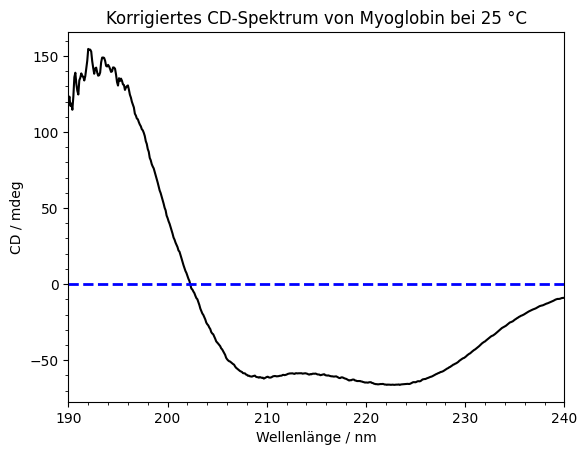

In [ ]:
#@title Darstellung des CD-Spektrums

plt.plot(CD_Myoglob_25_Xvalues, CD_Myoglob_25_Yvalues, color="black")
plt.title(CD_Myoglob_25_Title)
plt.xlabel(CD_Myoglob_25_XLabel)
plt.ylabel(CD_Myoglob_25_YLabel)
plt.xlim(CD_Myoglob_25_XIntStart,CD_Myoglob_25_XIntEnd)

plt.minorticks_on()

plt.hlines(y=0.0, xmin=CD_Myoglob_25_XIntStart, xmax=CD_Myoglob_25_XIntEnd, linewidth=2, linestyle='dashed', color='b')

plt.show()


In [ ]:
#@title Darstellungsoptionen für die Darstellung der HT-Spannung in Abhängigkeit von der Wellenlänge
#@markdown Wählen Sie aus welche Daten sie darstellen möchten:
XWerte = 'Wellenlänge' #@param ["Wellenlänge", "CD-Wert", "HT-Spannung"]
if(XWerte == 'Wellenlänge'):
  xdata = wavelength
elif(XWerte == 'CD-Wert'):
  xdata = spec_cor
else:
  xdata = HTvoltage
YWerte = 'HT-Spannung' #@param ["Wellenlänge", "CD-Wert", "HT-Spannung"]
if(YWerte == 'Wellenlänge'):
  ydata = wavelength
elif(YWerte == 'CD-Wert'):
  ydata = CDvalue
else:
  ydata = HTvoltage
#@markdown Geben Sie dem Graphen einen Titel und entsprechende Achsenbeschriftungen, vergessen Sie die Einheiten nicht.
Graphtitel = 'HT-Spannung w\xE4hrend der Messung von Myoglobin' #@param {type:"string"}
XAchsenbeschriftung = 'Wellenl\xE4nge / nm' #@param {type:"string"}
YAchsenbeschriftung = 'HT-Spannung / V' #@param {type:"string"}
#@markdown Überlegen Sie sich in welchem X-Wertebereich eine Darstellung sinnvoll ist:
XIntervallStart = 190 #@param {type:"integer"}
XIntervallEnde = 240 #@param {type:"integer"}

HT_Myoglob_25_Xvalues = xdata
HT_Myoglob_25_Yvalues = ydata
HT_Myoglob_25_Title = Graphtitel
HT_Myoglob_25_XLabel = XAchsenbeschriftung
HT_Myoglob_25_YLabel = YAchsenbeschriftung
HT_Myoglob_25_XIntStart = XIntervallStart
HT_Myoglob_25_XIntEnd = XIntervallEnde


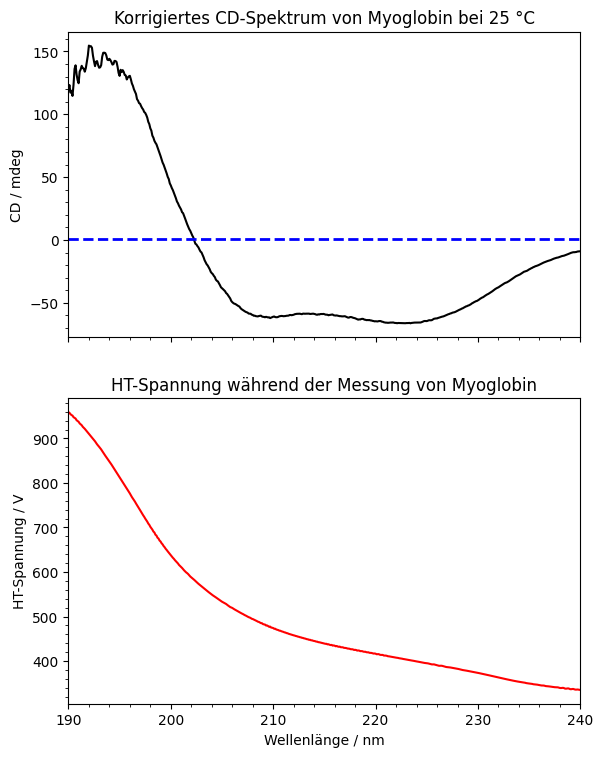

In [ ]:
#@title Darstellung der HT-Spannung
fig, axs = plt.subplots(2, sharex=True)
#fig.suptitle('Vertically stacked subplots')
axs[0].plot(CD_Myoglob_25_Xvalues, CD_Myoglob_25_Yvalues,color="black")
axs[1].plot(HT_Myoglob_25_Xvalues, HT_Myoglob_25_Yvalues,color="red")

axs[0].set_title(CD_Myoglob_25_Title)
axs[1].set_title(HT_Myoglob_25_Title)

axs[1].set_xlim([HT_Myoglob_25_XIntStart, HT_Myoglob_25_XIntEnd])

axs[0].set(ylabel=CD_Myoglob_25_YLabel)
axs[1].set(xlabel=HT_Myoglob_25_XLabel,ylabel=HT_Myoglob_25_YLabel)


axs[0].minorticks_on()
axs[1].minorticks_on()

axs[0].axhline(y=0.5, linewidth=2, linestyle='dashed', color='b')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=0.4,
                    hspace=0.2)

plt.savefig('CD_Myoglobin_25dg_HT.png', dpi=300)

plt.show()



In [ ]:
#@title Download des CD-Spektrums
files.download('CD_Myoglobin_25dg_HT.png')

In [ ]:
#@title Berechnung der Mean Residue Ellipticity (MRE)
#@markdown Geben Sie das mittlere Residuengewicht in g/mol an:
MRW_MRE = 110.93 #@param {type:"number"}
#@markdown Geben Sie die Konzentration in g/l an:
c_MRE = 1.54 #@param {type:"number"}
#@markdown Geben Sie die Schichtdicke der Küvette in cm an:
d_MRE = 0.1 #@param {type:"number"}
#@markdown Geben Sie den Faktor an, welcher notwendig ist um aus den aufgenommenen CD-Werten mit den anderen angegeben Größen auf die MRE in der Einheit $° \cdot \mathrm{cm}^2 \cdot \mathrm{dmol}^{-1}$ zu kommen:
factor_MRE = 0.1 #@param {type:"number"}
#@markdown Die benutzte Formel entspricht Formel 8 im Skript: $\frac{\mathrm{factor_{MRE}} \cdot \Theta(\lambda) \cdot \mathrm{MRW_{MRE}}}{\mathrm{c_{MRE}} \cdot \mathrm{d_{MRE}}}$

#delta_Epsilon = (0.1 * MRW_MRE * CDvalue) / (c_MRE * d_MRE * 3298)
#MRE = delta_Epsilon * 3298

MRE = (factor_MRE * MRW_MRE * CDvalue) / (c_MRE * d_MRE)

print(CDvalue[0])
#print(delta_Epsilon[0])
print(MRE[0])


-9.09787
-0.19870892219211958
-655.3420253896104


In [ ]:
#@title Export der korrigierten Daten
#@markdown Geben Sie der zu exportierenden Datei einen Namen: 
Exportname = 'Myoglobin_25deg_CDvalues' #@param {type:"string"}
Exportname = Exportname + '.txt'
exportDataMat = np.array([CD_Myoglob_25_Xvalues, CD_Myoglob_25_Yvalues])
exportDataMat = exportDataMat.T
import sys
np.savetxt(Exportname, exportDataMat, '%5.2f',delimiter = '\t')


In [ ]:
#@title Download der exportierten Daten

files.download(Exportname); 
#@markdown Die Datei wird möglicherweise zweimal heruntergeladen.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Gehen Sie als nächstes auf [DichroWeb](http://dichroweb.cryst.bbk.ac.uk/html/home.shtml).

1.   Legen Sie einen User-Account über die Weiterleitung [Apply for a user-account](http://dichroweb.cryst.bbk.ac.uk/html/apply.shtml) an. Benutzen Sie Ihre Studenten-Email-Adresse! Sie sollten nun eine Email bekommen in der Ihnen **UserID** und **IDpassword** mitgeteilt wird. 
2.   Navigieren Sie nun über die linke Seite der Seite auf [Input Data](http://dichroweb.cryst.bbk.ac.uk/html/process.shtml)
  *   Unter dem Punkt **Registration** geben Sie die Ihnen zugeschickten Anmeldedaten ein.
  *   Unter **Input File Details** können Sie einen Namen (*Protein name*) z.B. Myoglobin eintragen und darunter (*File location*) die exportierten Daten auswählen.  
  *   Unter dem Punkt **About the Data File**:
       *   wählen Sie als *File Format* JASCO 1.30
       *   für die *Input Units* mean residue ellipticity
       *   die *Initial Wavelength (nm)* ist in unserem Falle die höchste Wellenlänge
       *   die *Final Wavelength (nm)* ist hier die niedrigeste Wellenlänge
       *   wählen Sie den richtigen *Wavelength Step (nm)* aus
       *   als *Lowest nm datapoint to use in the analysis* benutzen sie die niedrigeste Wellenlänge
  *   Unter dem Punkt **Choice of Methods** wählen Sie als *Analysis Programme* K2D und lassen Sie das *Reference Set* offen. 
  *   Den Punkt **Advanced Options** lassen Sie unangetastet.
  *   Unter dem Punkt **Output Options** wählen Sie unter *Output Units* mean residue ellipticity

Schicken Sie die Anfrage über einen Klick auf **submit** ab.
3.   Sehen Sie sich die *Compact Results* an indem Sie auf das *SHOW* darunter klicken. Notieren Sie sich die ausgegebenen Anteile für alpha-Helix, beta-Flatblatt und Zufallsknäuel. Notieren Sie auch den maximalen Fehler.
4.   Wiederholen Sie die Eingabe unter [Input Data](http://dichroweb.cryst.bbk.ac.uk/html/process.shtml). Benutzen Sie diesmal SELCON3 als *Analysis Programme* und wählen Sie als *Reference Set* Set 7 aus. Lassen Sie sich die *Compact Results* anzeigen und notieren Sie diese.
5. Wo liegt der Unterschied zwischen den beiden Ergebnissen? Schauen Sie sich dazu auch [diese Seite](http://dichroweb.cryst.bbk.ac.uk/html/userguide_datasets.shtml) an. 







In [ ]:
#@title Einladen der **Schmelzkurve** von Myoglobin
meltingCurveUpload = files.upload()
meltingCurveFileName = next(iter(meltingCurveUpload))

Saving 005_MyoglobinMeltingCurve.txt to 005_MyoglobinMeltingCurve.txt


In [ ]:
#@title Herausschreiben der **Temperatur** mit den zugehörigen Werten für **CD** und die **HT-Spannung** jeweils bei 223 nm aus den *zuvor eingeladenen* .txt-Dateien
import numpy as np 
# Text file data converted to float CD_data skipping the header (first 19 lines)
MC_data = np.loadtxt(meltingCurveFileName, skiprows=19, dtype=float)
MC_temperature = (MC_data[:,0])
MC_CD = (MC_data[:,1])
MC_HT = (MC_data[:,2])
#print(MC_temperature)

In [ ]:
#@title Darstellungsoptionen für die Darstellung der Schmelzkurve von Myoglobin
#@markdown Wählen Sie aus welche Daten sie darstellen möchten:
XWerte = 'Temperatur' #@param ["Temperatur", "CD-Wert", "HT-Spannung"]
if(XWerte == 'Temperatur'):
  xdata = MC_temperature
elif(XWerte == 'CD-Wert'):
  xdata = MC_CD
else:
  xdata = MC_HT
YWerte = 'CD-Wert' #@param ["Temperatur", "CD-Wert", "HT-Spannung"]
if(YWerte == 'Temperatur'):
  ydata = MC_temperature
elif(YWerte == 'CD-Wert'):
  ydata = MC_CD
else:
  ydata = MC_HT
#@markdown Geben Sie dem Graphen einen Titel und entsprechende Achsenbeschriftungen, vergessen Sie die Einheiten nicht.
Graphtitel = 'Schmelzkurve von Myoglobin bei 223 nm' #@param {type:"string"}
XAchsenbeschriftung = 'Temperatur / \xB0C' #@param {type:"string"}
YAchsenbeschriftung = 'CD / mdeg' #@param {type:"string"}
#@markdown Überlegen Sie sich in welchem X-Wertebereich eine Darstellung sinnvoll ist:
XIntervallStart = 60 #@param {type:"integer"}
XIntervallEnde = 90 #@param {type:"integer"}


MC_Myoglob_Xvalues = xdata
MC_Myoglob_Yvalues = ydata
MC_Myoglob_Title = Graphtitel
MC_Myoglob_XLabel = XAchsenbeschriftung
MC_Myoglob_YLabel = YAchsenbeschriftung
MC_Myoglob_XIntStart = XIntervallStart
MC_Myoglob_XIntEnd = XIntervallEnde


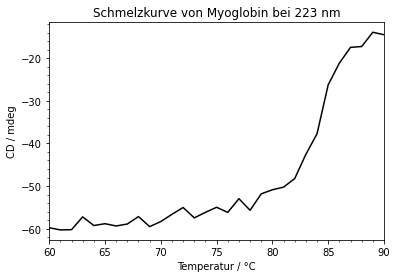

In [ ]:
#@title Darstellung der Schmelzkurve
# importing the required module
import matplotlib.pyplot as plt

plt.plot(MC_Myoglob_Xvalues, MC_Myoglob_Yvalues, color="black")
plt.title(MC_Myoglob_Title)
plt.xlabel(MC_Myoglob_XLabel)
plt.ylabel(MC_Myoglob_YLabel)
plt.xlim(MC_Myoglob_XIntStart,MC_Myoglob_XIntEnd)

plt.minorticks_on()

plt.show()


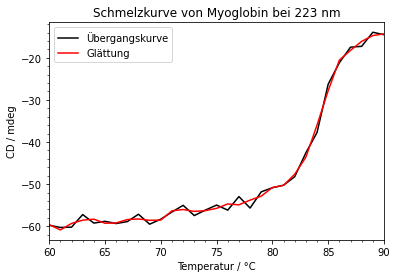

In [ ]:
#@title Kurvenanglättung der Übergangskurve
#@markdown Bevor die Übergangstemperatur bestimmt wird sollte die aufgenommene Schmelzkurve geglättet werden. Probieren Sie unterschiedliche Fensterbreiten und Polynomgrade aus und wählen Sie eine Kombination, die die Daten gut widerspiegelt.
Fensterbreite = 5 #@param {type:"integer"}
Polynomgrad = 3 #@param {type:"integer"}
from scipy.signal import savgol_filter

MC_smooth = savgol_filter(MC_Myoglob_Yvalues, Fensterbreite, Polynomgrad) # window size 5, polynomial order 3

plt.plot(MC_Myoglob_Xvalues, MC_Myoglob_Yvalues, color="black", label="Übergangskurve")
plt.plot(MC_Myoglob_Xvalues,MC_smooth, color='red', label="Glättung")
plt.title(MC_Myoglob_Title)
plt.xlabel(MC_Myoglob_XLabel)
plt.ylabel(MC_Myoglob_YLabel)
plt.xlim(MC_Myoglob_XIntStart,MC_Myoglob_XIntEnd)
plt.legend()

plt.minorticks_on()

plt.savefig('Myoglobin_tr.png', dpi=300)

plt.show()


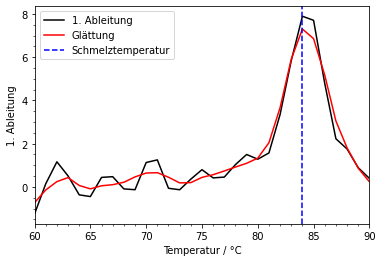

In [ ]:
#@title Bestimmung der Übergangstemperatur
#@markdown Probieren Sie auch hier Glättungsparameter aus.
Fensterbreite = 7 #@param {type:"integer"}
Polynomgrad = 2 #@param {type:"integer"}

processedData = np.gradient(MC_smooth)
MC_diff_smooth = savgol_filter(processedData, Fensterbreite, Polynomgrad) # window size 5, polynomial order 3


#@markdown Welcher Punkt der 1. Ableitung entspricht der Schmelztemperatur?
TM = 'Maximum' #@param ["Minimum", "Maximum"]
if(TM == 'Minimum'):
  tm = MC_Myoglob_Xvalues[np.argmin(MC_diff_smooth)]
else:
  tm = MC_Myoglob_Xvalues[np.argmax(MC_diff_smooth)]

processedData = np.gradient(MC_smooth)
MC_diff_smooth = savgol_filter(processedData, 7, 2) # window size 5, polynomial order 3


plt.plot(MC_Myoglob_Xvalues, processedData, color="black", label="1. Ableitung")
plt.plot(MC_Myoglob_Xvalues, MC_diff_smooth, color="red", label="Glättung")

plt.xlabel(MC_Myoglob_XLabel)
plt.ylabel('1. Ableitung')
plt.xlim(MC_Myoglob_XIntStart,MC_Myoglob_XIntEnd)

plt.minorticks_on()
plt.axvline(x = tm, color = 'b', linestyle='dashed',label = 'Schmelztemperatur')

plt.legend()
plt.show()

In [ ]:
#@title Einladen des **Protein-CD-Spektrums bei 65 °C**
CD60Upload = files.upload()
CD60FileName = next(iter(CD60Upload))

Saving 003_Myoglobin_07mg_ml_60deg.txt to 003_Myoglobin_07mg_ml_60deg.txt


In [ ]:
#@title Einladen des **Protein-CD-Spektrums bei 95 °C**
CD90Upload = files.upload()
CD90FileName = next(iter(CD90Upload))

Saving 003_Myoglobin_07mg_ml_90deg.txt to 003_Myoglobin_07mg_ml_90deg (1).txt


In [ ]:
#@title Herausschreiben der **Wellenlänge** mit den zugehörigen Werten für **CD** und die **HT-Spannung** aus den *zuvor eingeladenen* .txt-Dateien
import numpy as np 
# Text file data converted to float CD_data skipping the header (first 19 lines)
CD_data_60 = np.loadtxt(CD60FileName, skiprows=19, dtype=float)
wavelength_60 = (CD_data_60[:,0])
CDvalue_60  = (CD_data_60[:,1])
HTvoltage_60  = (CD_data_60[:,2])
# Text file data converted to float CD_data skipping the header (first 19 lines)
CD_data_90 = np.loadtxt(CD90FileName, skiprows=19, dtype=float)
wavelength_90 = (CD_data_90[:,0])
CDvalue_90 = (CD_data_90[:,1])
HTvoltage_90 = (CD_data_90[:,2])


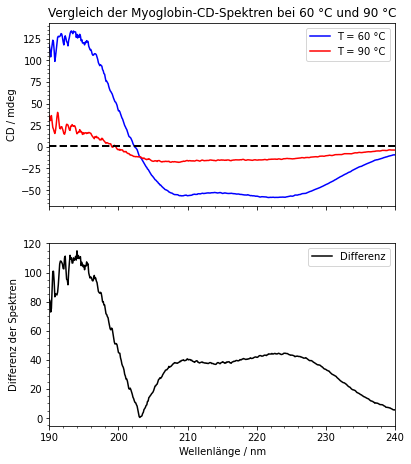

In [ ]:
#@title Darstellung der Myoglobinspektren bei 65 °C und 95 °C

Graphtitel = 'Vergleich der Myoglobin-CD-Spektren bei 60 \xB0C und 90 \xB0C' #@param {type:"string"}
XAchsenbeschriftung = 'Wellenl\xE4nge / nm' #@param {type:"string"}
YAchsenbeschriftung = 'CD / mdeg' #@param {type:"string"}
XIntervallStart = 190 #@param {type:"integer"}
XIntervallEnde = 240 #@param {type:"integer"}


Title_60_90 = Graphtitel
XLabel_60_90  = XAchsenbeschriftung
YLabel_60_90  = YAchsenbeschriftung
XIntStart_60_90  = XIntervallStart
XIntEnd_60_90  = XIntervallEnde

fig, axs = plt.subplots(2, sharex=True)
#fig.suptitle('Vertically stacked subplots')
axs[0].plot(wavelength_60, CDvalue_60, color="blue", label="T = 65 °C")
axs[0].plot(wavelength_90, CDvalue_90, color="red", label="T = 95 °C")
CDval_diff = CDvalue_60 - CDvalue_90
CDval_diff = np.square(CDval_diff)
CDval_diff = np.sqrt(CDval_diff)
axs[1].plot(wavelength_90, CDval_diff, color="black", label="Differenz")

axs[0].set_title(Title_60_90)
#axs[1].set_title('Differenz der Spektren')

axs[1].set_xlim([XIntStart_60_90, XIntEnd_60_90])

axs[0].set(ylabel=YLabel_60_90)
axs[1].set(xlabel=XLabel_60_90,ylabel='Differenz der Spektren')


axs[0].minorticks_on()
axs[1].minorticks_on()

axs[0].axhline(y=0.5, linewidth=2, linestyle='dashed', color='black')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=0.4,
                    hspace=0.2)
axs[0].legend()
axs[1].legend()

plt.savefig('CD_Myoglobin_65_95deg.png', dpi=300)

plt.show()


In [ ]:
#@title Download der CD-Spektren bei 65 und 95 °C
files.download('CD_Myoglobin_65_95deg.png')